Loaded dataset with shape: (6607, 20)
Columns: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']
Before dropna: (6607, 2)
After dropna: (6607, 2)
       Hours_Studied   Exam_Score
count    6607.000000  6607.000000
mean       19.975329    67.235659
std         5.990594     3.890456
min         1.000000    55.000000
25%        16.000000    65.000000
50%        20.000000    67.000000
75%        24.000000    69.000000
max        44.000000   101.000000


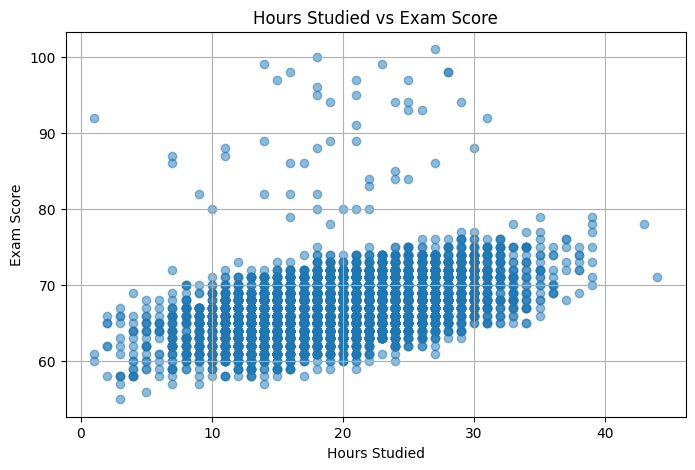

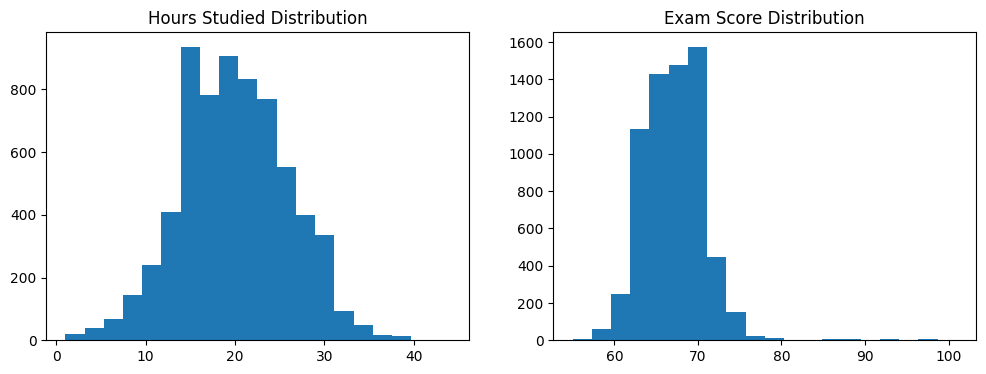

Train size: (5285, 1) Test size: (1322, 1)
Linear Regression metrics:
R2: 0.232
MAE: 2.4476
RMSE: 3.2948


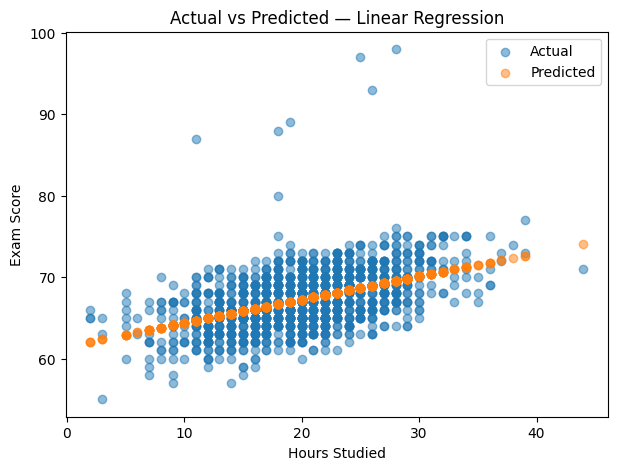

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


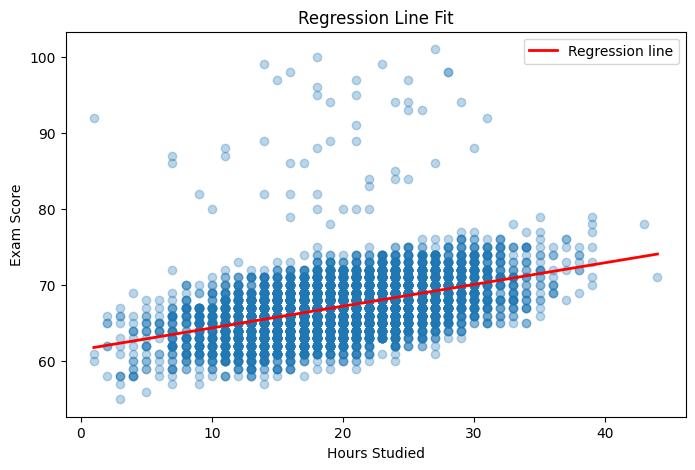

Example: predicted score for 20 hours = 67.22


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [3]:
# Task 1 — Student Score Prediction (Google Colab ready)
# -----------------------------------------------------
# Colab-friendly notebook script. Paste cells into Colab or upload as .py
# This version uses **only Linear Regression** (no polynomial) and contains:
# - Data load (from upload or Drive)
# - Data cleaning (keeps Hours_Studied & Exam_Score)
# - EDA (scatter + histograms)
# - Train/test split
# - Linear regression training + evaluation (R2, MAE, RMSE)\# - Visualizations
# - Interactive prediction cell
# - Optional: save trained model to Drive

# %%
# Install (Colab already has these, but kept for reproducibility)
!pip install -q scikit-learn pandas matplotlib joblib

# %% [markdown]
# ## 1. Setup & Load Data
# Place `StudentPerformanceFactors.csv` in the Colab session (Files panel) or
# in your Google Drive (e.g., MyDrive/) and update the path below if needed.

# %%
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

DATA_FILENAME = 'StudentPerformanceFactors.csv'

if os.path.exists(DATA_FILENAME):
    df = pd.read_csv(DATA_FILENAME)
else:
    drive_path = '/content/drive/MyDrive/' + DATA_FILENAME
    if os.path.exists(drive_path):
        df = pd.read_csv(drive_path)
    else:
        raise FileNotFoundError(
            f"{DATA_FILENAME} not found in session or Drive. Upload the CSV to Colab or place it in Drive.")

print('Loaded dataset with shape:', df.shape)
print('Columns:', list(df.columns))

# %% [markdown]
# ## 2. Data Cleaning
# Keep only the two columns needed for the task.

# %%
df_clean = df[['Hours_Studied', 'Exam_Score']].copy()
# Convert to numeric (if strings present) and drop missing
df_clean['Hours_Studied'] = pd.to_numeric(df_clean['Hours_Studied'], errors='coerce')
df_clean['Exam_Score'] = pd.to_numeric(df_clean['Exam_Score'], errors='coerce')
print('Before dropna:', df_clean.shape)
df_clean.dropna(inplace=True)
print('After dropna:', df_clean.shape)
print(df_clean.describe())

# %% [markdown]
# ## 3. Exploratory Data Analysis (EDA)

# %%
plt.figure(figsize=(8,5))
plt.scatter(df_clean['Hours_Studied'], df_clean['Exam_Score'], alpha=0.5)
plt.title('Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

# %%
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].hist(df_clean['Hours_Studied'], bins=20)
ax[0].set_title('Hours Studied Distribution')
ax[1].hist(df_clean['Exam_Score'], bins=20)
ax[1].set_title('Exam Score Distribution')
plt.show()

# %% [markdown]
# ## 4. Train/Test Split

# %%
X = df_clean[['Hours_Studied']]
y = df_clean['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train size:', X_train.shape, 'Test size:', X_test.shape)

# %% [markdown]
# ## 5. Linear Regression Training & Evaluation

# %%
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation metrics
from math import sqrt

def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    return {'r2': r2, 'mae': mae, 'rmse': rmse}

metrics = evaluate_model(y_test, y_pred)
print('Linear Regression metrics:')
print('R2:', round(metrics['r2'],4))
print('MAE:', round(metrics['mae'],4))
print('RMSE:', round(metrics['rmse'],4))

# %%
# Plot actual vs predicted
plt.figure(figsize=(7,5))
plt.scatter(X_test, y_test, label='Actual', alpha=0.5)
plt.scatter(X_test, y_pred, label='Predicted', alpha=0.5)
plt.legend()
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Actual vs Predicted — Linear Regression')
plt.show()

# Plot regression line over scatter (using full data range)
xs = np.linspace(df_clean['Hours_Studied'].min(), df_clean['Hours_Studied'].max(), 100).reshape(-1,1)
ys = model.predict(xs)
plt.figure(figsize=(8,5))
plt.scatter(df_clean['Hours_Studied'], df_clean['Exam_Score'], alpha=0.3)
plt.plot(xs, ys, color='red', linewidth=2, label='Regression line')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Regression Line Fit')
plt.legend()
plt.show()

# %% [markdown]
# ## 6. Interactive Prediction
# Enter study hours and get a predicted exam score from the trained model.

# %%
def predict_score(hours):
    """Return predicted exam score for given study hours."""
    return float(model.predict([[hours]])[0])

# Example
example_hours = 20
print(f'Example: predicted score for {example_hours} hours =', round(predict_score(example_hours),2))

# %% [markdown]
# ## 7. Optional: Save model to Google Drive
# If you mounted Drive and want to save, set this to True and adjust path.

# %%
SAVE_TO_DRIVE = False  # set True if you mounted Drive and want to save
if SAVE_TO_DRIVE:
    save_dir = '/content/drive/MyDrive/student_models'
    os.makedirs(save_dir, exist_ok=True)
    joblib.dump(model, os.path.join(save_dir, 'linear_model.joblib'))
    print('Saved model to', save_dir)

# %% [markdown]
# ## End of notebook

